In [1]:
import requests
from IPython.display import Markdown
from tqdm import tqdm, tqdm_notebook
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import altair as alt
from requests.utils import quote
import os
from datetime import timedelta
from mod import alt_theme

In [2]:
fmt = "{:%Y-%m-%d}"

# Can optionally use number of days to choose dates
n_days = 60
end_date = fmt.format(pd.datetime.today())
start_date = fmt.format(pd.datetime.today() - timedelta(days=n_days))

renderer = "kaggle"
github_orgs = ["jupyterhub", "jupyter", "jupyterlab", "jupyter-widgets", "ipython", "binder-examples", "nteract"]
bot_names = ["stale", "codecov", "jupyterlab-dev-mode", "henchbot"]

<ipython-input-2-149463e7ffff>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  end_date = fmt.format(pd.datetime.today())
<ipython-input-2-149463e7ffff>:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  start_date = fmt.format(pd.datetime.today() - timedelta(days=n_days))


In [3]:
alt.renderers.enable(renderer);
alt.themes.register('my_theme', alt_theme)
alt.themes.enable("my_theme")

ThemeRegistry.enable('my_theme')

In [4]:
# Discourse API key
api = {'Api-Key': os.environ['DISCOURSE_API_KEY'],
       'Api-Username': os.environ['DISCOURSE_API_USERNAME']}

In [5]:
# Discourse
def topics_to_markdown(topics, n_list=10):
    body = []
    for _, topic in topics.iterrows():
        title = topic['fancy_title']
        slug = topic['slug']
        posts_count = topic['posts_count']
        url = f'https://discourse.jupyter.org/t/{slug}'
        body.append(f'* [{title}]({url}) ({posts_count} posts)')
    body = body[:n_list]
    return '\n'.join(body)

def counts_from_activity(activity):
    counts = activity.groupby('category_id').count()['bookmarked'].reset_index()
    counts['parent_category'] = None
    for ii, irow in counts.iterrows():
        if parent_categories[irow['category_id']] is not None:
            counts.loc[ii, 'parent_category'] = parent_categories[irow['category_id']]

    counts['category_id'] = counts['category_id'].map(lambda a: category_mapping[a])
    counts['parent_category'] = counts['parent_category'].map(lambda a: category_mapping[a] if a is not None else 'parent')
    is_parent = counts['parent_category'] == 'parent'
    counts.loc[is_parent, 'parent_category'] = counts.loc[is_parent, 'category_id'] 
    counts['parent/category'] = counts.apply(lambda a: a['parent_category']+'/'+a['category_id'], axis=1)
    counts = counts.sort_values(['parent_category', 'bookmarked'], ascending=False)
    return counts

# Community forum activity

The [Jupyter Community Forum](https://discourse.jupyter.org) is a place for Jovyans across the
community to talk about Jupyter tools in interactive computing and how they fit into their
workflows. It's also a place for developers to share ideas, tools, tips, and help one another.

Below are a few updates from activity in the Discourse. For more detailed information about
the activity on the Community Forum, check out these links:

* [The users page](https://discourse.jupyter.org/u) has information about user activity
* [The top posts page](https://discourse.jupyter.org/top) contains a list of top posts, sorted
  by various metrics.

In [6]:
# Get categories for IDs
url = "https://discourse.jupyter.org/site.json"
resp = requests.get(url, headers=api)
category_mapping = {cat['id']: cat['name'] for cat in resp.json()['categories']}
parent_categories = {cat['id']: cat.get("parent_category_id", None) for cat in resp.json()['categories']}

KeyError: 'categories'

In [7]:
# Base URL to use
url = "https://discourse.jupyter.org/latest.json"

## Topics with lots of likes

"Likes" are a way for community members to say thanks for a helpful post, show their
support for an idea, or generally to share a little positivity with somebody else.
These are topics that have generated lots of likes in recent history.

In [7]:
params = {"order": "likes", "ascending": "False"}
resp = requests.get(url, headers=api, params=params)

# Topics with the most likes in recent history
liked = pd.DataFrame(resp.json()['topic_list']['topics'])
Markdown(topics_to_markdown(liked))

* [Introduce yourself!](https://discourse.jupyter.org/t/introduce-yourself) (101 posts)
* [{WIP} Re-Design of Jupyter.org Website](https://discourse.jupyter.org/t/wip-re-design-of-jupyter-org-website) (53 posts)
* [Jupyter Community Calls](https://discourse.jupyter.org/t/jupyter-community-calls) (28 posts)
* [JupyterHub, Binder workshop in Oslo, Sept. 5-8](https://discourse.jupyter.org/t/jupyterhub-binder-workshop-in-oslo-sept-5-8) (15 posts)
* [Help us choose an updated &ldquo;Launch Binder&rdquo; badge!](https://discourse.jupyter.org/t/help-us-choose-an-updated-launch-binder-badge) (21 posts)
* [The Binder Federation](https://discourse.jupyter.org/t/the-binder-federation) (14 posts)
* [PyCon 2019 and mybinder.org](https://discourse.jupyter.org/t/pycon-2019-and-mybinder-org) (17 posts)
* [Microsoft Word Integration (Intern Project)](https://discourse.jupyter.org/t/microsoft-word-integration-intern-project) (17 posts)
* [Jupyter community workshop: proposal on diversity, inclusion and accessibility](https://discourse.jupyter.org/t/jupyter-community-workshop-proposal-on-diversity-inclusion-and-accessibility) (20 posts)
* [Sunset the GitHub repo jupyter/help?](https://discourse.jupyter.org/t/sunset-the-github-repo-jupyter-help) (17 posts)

## Active topics on the Community Forum

These are topics with lots of activity in recent history.

In [8]:
params = {"order": "posts", "ascending": "False"}
resp = requests.get(url, headers=api, params=params)

# Topics with the most posts in recent history
posts = pd.DataFrame(resp.json()['topic_list']['topics'])
Markdown(topics_to_markdown(posts))

* [Introduce yourself!](https://discourse.jupyter.org/t/introduce-yourself) (101 posts)
* [{WIP} Re-Design of Jupyter.org Website](https://discourse.jupyter.org/t/wip-re-design-of-jupyter-org-website) (53 posts)
* [Tip: embed custom github content in a Binder link with nbgitpuller](https://discourse.jupyter.org/t/tip-embed-custom-github-content-in-a-binder-link-with-nbgitpuller) (52 posts)
* [Would a &ldquo;The Littlest Binder&rdquo; be useful?](https://discourse.jupyter.org/t/would-a-the-littlest-binder-be-useful) (31 posts)
* [Jupyter Community Calls](https://discourse.jupyter.org/t/jupyter-community-calls) (28 posts)
* [Plugins of considerations](https://discourse.jupyter.org/t/plugins-of-considerations) (28 posts)
* [A proposal for JupyterHub communications](https://discourse.jupyter.org/t/a-proposal-for-jupyterhub-communications) (26 posts)
* [Binder/BinderHub Workshops &ndash; Help Wanted!](https://discourse.jupyter.org/t/binder-binderhub-workshops-help-wanted) (25 posts)
* [Help us choose an updated &ldquo;Launch Binder&rdquo; badge!](https://discourse.jupyter.org/t/help-us-choose-an-updated-launch-binder-badge) (21 posts)
* [Rename this category to Jupyter Server?](https://discourse.jupyter.org/t/rename-this-category-to-jupyter-server) (21 posts)

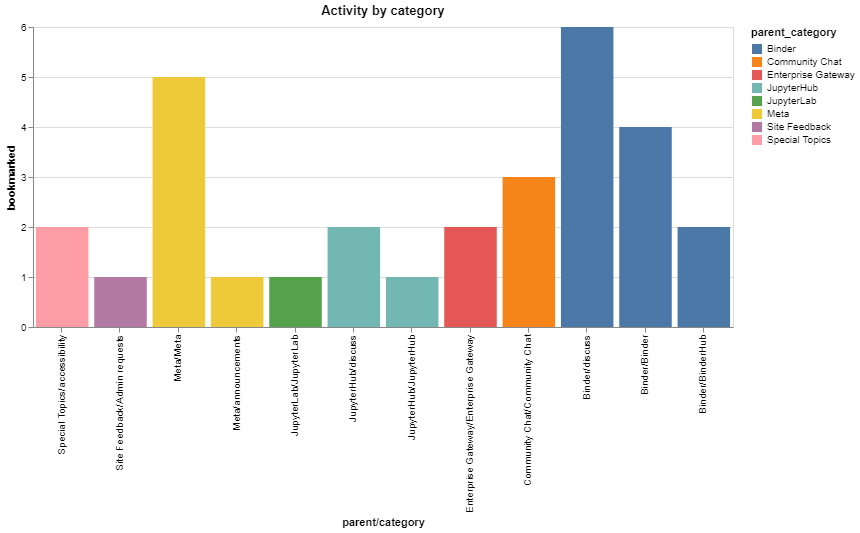

In [9]:
counts = counts_from_activity(posts)
alt.Chart(data=counts, width=700, height=300, title="Activity by category").mark_bar().encode(
    x=alt.X("parent/category", sort=alt.Sort(counts['category_id'].values.tolist())),
    y="bookmarked",
    color="parent_category"
)

## Recently-created topics

These are topics that were recently created, sorted by the amount of activity
in each one.

In [10]:
params = {"order": "created", "ascending": "False"}
resp = requests.get(url, headers=api, params=params)

# Sort created by the most posted for recently-created posts
created = pd.DataFrame(resp.json()['topic_list']['topics'])
created = created.sort_values('posts_count', ascending=False)
Markdown(topics_to_markdown(created))

* [What happens when the Hub restarts?](https://discourse.jupyter.org/t/what-happens-when-the-hub-restarts) (7 posts)
* [Guidance for local Jupyter Days events](https://discourse.jupyter.org/t/guidance-for-local-jupyter-days-events) (5 posts)
* [Extension development very slow](https://discourse.jupyter.org/t/extension-development-very-slow) (5 posts)
* [MP Workshop on MyBinder](https://discourse.jupyter.org/t/mp-workshop-on-mybinder) (4 posts)
* [Resources for giving talks about the JupyterHub and Binder projects](https://discourse.jupyter.org/t/resources-for-giving-talks-about-the-jupyterhub-and-binder-projects) (4 posts)
* [Ipywidgets for jupyterlab 1.0](https://discourse.jupyter.org/t/ipywidgets-for-jupyterlab-1-0) (3 posts)
* [What is the best way to add numbers to equations in a Markdown cell in a Jupyter Lab notebook?](https://discourse.jupyter.org/t/what-is-the-best-way-to-add-numbers-to-equations-in-a-markdown-cell-in-a-jupyter-lab-notebook) (3 posts)
* [Binder workshop Sun. July 21, 9 am to 1 pm Swiss time: ~50 users](https://discourse.jupyter.org/t/binder-workshop-sun-july-21-9-am-to-1-pm-swiss-time-50-users) (3 posts)
* [How do I enable a bash kernel?](https://discourse.jupyter.org/t/how-do-i-enable-a-bash-kernel) (3 posts)
* [Can one display bullet points under plots using jupyter slides?](https://discourse.jupyter.org/t/can-one-display-bullet-points-under-plots-using-jupyter-slides) (2 posts)

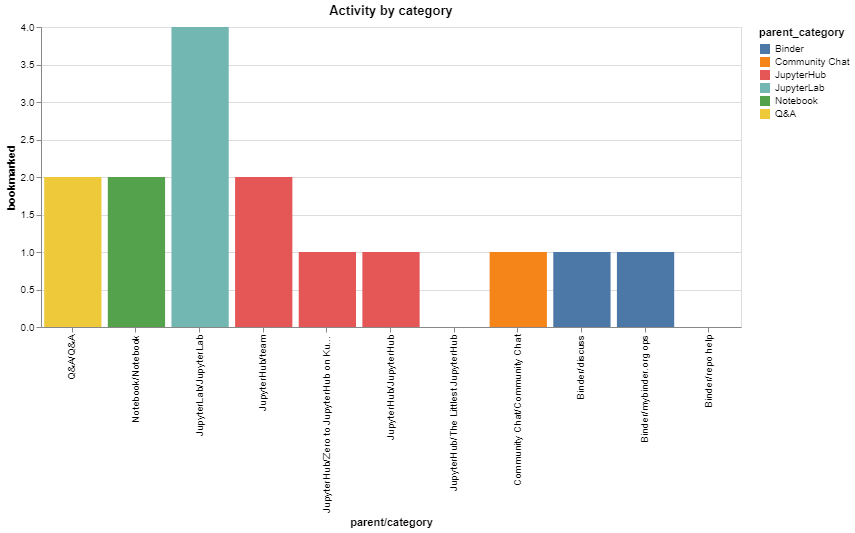

In [11]:
counts = counts_from_activity(created)
alt.Chart(data=counts, width=700, height=300, title="Activity by category").mark_bar().encode(
    x=alt.X("parent/category", sort=alt.Sort(counts['category_id'].values.tolist())),
    y="bookmarked",
    color="parent_category"
)

## User activity in the Community Forum

**Top posters**

These people have posted lots of comments, replies, answers, etc in the community forum.

In [12]:
def plot_user_data(users, column, sort=False):
    plt_data = users.sort_values(column, ascending=False).head(50)
    x = alt.X("username", sort=plt_data['username'].tolist()) if sort is True else 'username'
    ch = alt.Chart(data=plt_data).mark_bar().encode(
        x=x,
        y=column
    )
    return ch

In [13]:
url = "https://discourse.jupyter.org/directory_items.json"
params = {"period": "quarterly", "order": "post_count"}
resp = requests.get(url, headers=api, params=params)

# Topics with the most likes in recent history
users = pd.DataFrame(resp.json()['directory_items'])
users['username'] = users['user'].map(lambda a: a['username'])

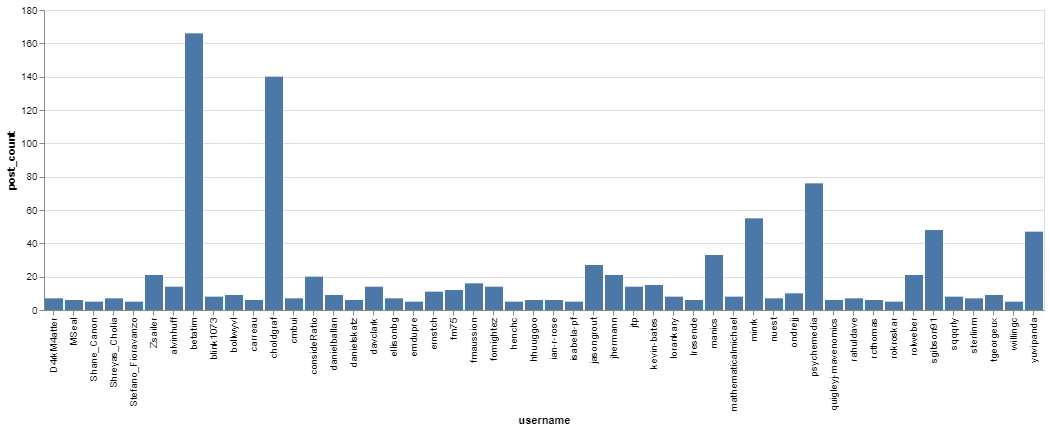

In [14]:
plot_user_data(users.head(50), 'post_count')

**Forum users, sorted by likes given**

These are Community Forum members that "liked" other people's posts. We appreciate
anybody taking the time to tell someone else they like what they're shared!

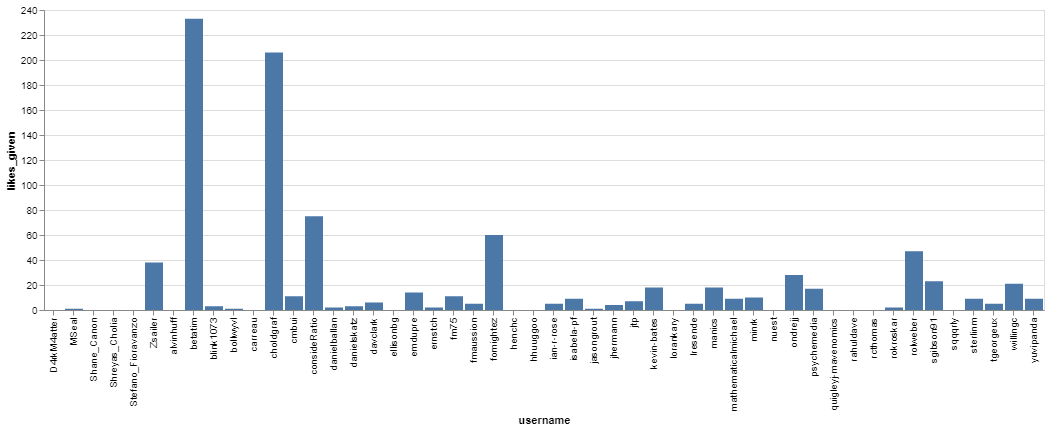

In [15]:
plot_user_data(users.head(50), 'likes_given')

**Forum users, sorted by likes received**

These are folks that posted things other people in the Community Forum liked.

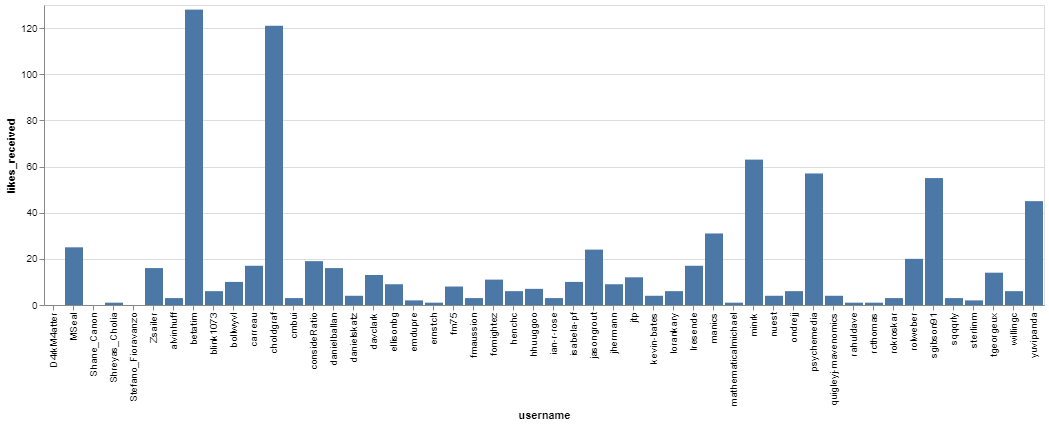

In [16]:
plot_user_data(users.head(50), 'likes_received')

In [ ]:
%%html
<script src="https://cdn.rawgit.com/parente/4c3e6936d0d7a46fd071/raw/65b816fb9bdd3c28b4ddf3af602bfd6015486383/code_toggle.js"></script>